In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , accuracy_score , precision_score , recall_score , f1_score, classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 


In [4]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.shape

(200, 6)

In [6]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [7]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [8]:
print(f"There are {df.duplicated().sum()} duplicates")

There are 0 duplicates


In [9]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

Text(0.5, 1.0, 'Distribution of Drug Type')

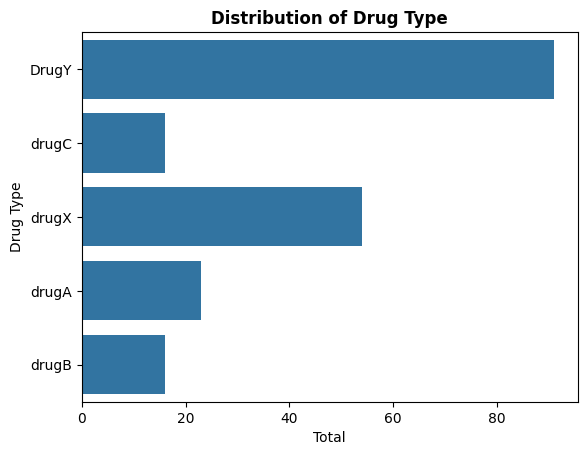

In [10]:
sns.countplot(y = 'Drug' , data = df)
plt.xlabel('Total') 
plt.ylabel('Drug Type') 
plt.title('Distribution of Drug Type' , fontweight = 'bold')

Text(0.5, 1.0, 'Age Distribution')

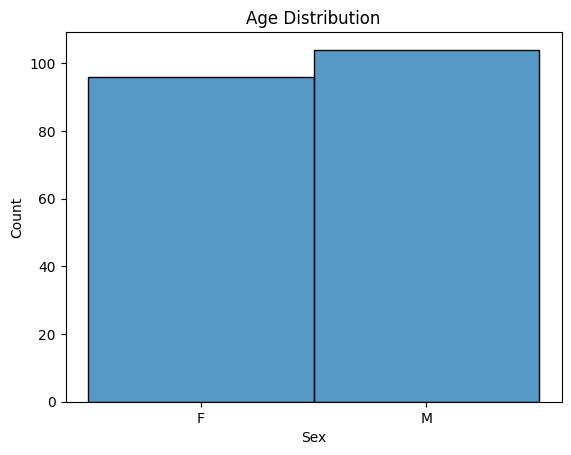

In [11]:
sns.histplot(df['Sex'])
plt.title("Age Distribution")

In [12]:
lab=LabelEncoder()
df['Sex']=lab.fit_transform(df['Sex'])
df['BP']=lab.fit_transform(df['BP'])
df['Cholesterol']=lab.fit_transform(df['Cholesterol'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,DrugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,DrugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


<Axes: >

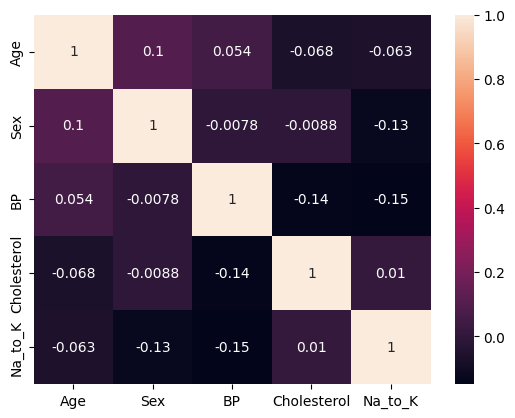

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [14]:
# create models. 
# Training | Test
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)
x_train.shape, y_train.shape

((140, 5), (140,))

In [15]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       0.80      0.92      0.86        26
       drugA       1.00      0.29      0.44         7
       drugB       0.43      1.00      0.60         3
       drugC       1.00      0.17      0.29         6
       drugX       0.85      0.94      0.89        18

    accuracy                           0.78        60
   macro avg       0.82      0.66      0.62        60
weighted avg       0.84      0.78      0.75        60



c:\Users\AdamHuang\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        26
       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60

